# 다중회귀 - 보스톤 주택 가격

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# 데이터 프레임 만들고, y값(target) 설정
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀선

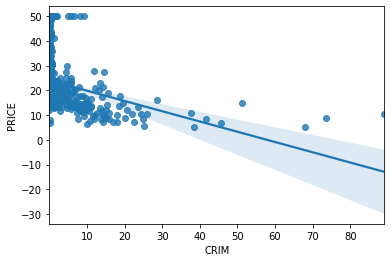

In [8]:
# X값 중 한 개만 확인해보고, 반복문 쓰기
# 음의 상관관계 확인
sns.regplot(x='CRIM', y='PRICE', data=df)
plt.show()

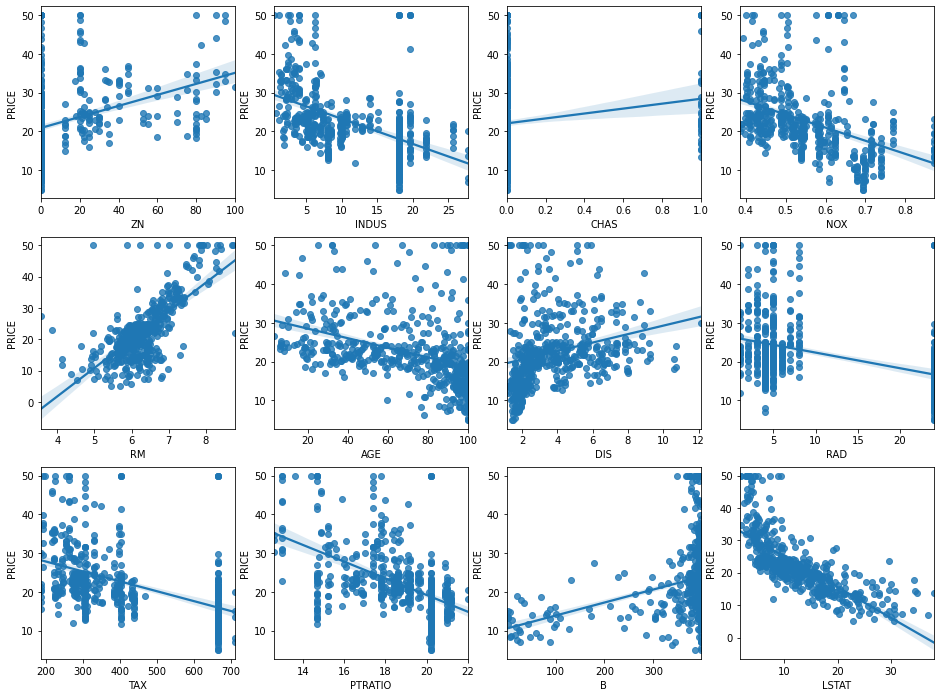

In [9]:
# R square값이 가장 작은 그래프는? - 회귀선 근처에 점이 몰려있는 그래프! 
_, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12)) # 행 3개 * 열 4개 = 12개 데이터 생성
                                                         # 튜플 언패킹
                                                         # fig, axs는 tuple => fig는 거의 사용하지 않아 _로 표현한다.
for i, feature in enumerate(df.columns[1:-1]): # 맨 첫번째는 CRIM => 제외
    row, col = i//4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- feature 별 R squared value

In [11]:
# 13개의 feature들 중에서 어떤 그래프가 회귀선 근처에 몰려있는가??
from sklearn.linear_model import LinearRegression

In [12]:
# CRIM
X = df.CRIM.values.reshape(-1,1) # df.CRIM.values는 1차원 데이터 -> 사이킷런은 2차원 배열만 받는다.
y = boston.target
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.15078046904975717

In [15]:
y = boston.target
for feature in df.columns[:-1]: # y값 빼고
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    score = lr.score(X, y)
    print(f'{feature}:\t{score:.4f}')

#  값이 클수록, 선에 몰려 있는 점이 밀집되어 있음을 확인할 수 있다. 

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2021
)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# 단일 선형회귀가 잘 만들었는지 확인 할때는 lr.score(X, y)
# 다중 선형회귀에서는 R squared value가 무의미
# 다중 선형회귀에 독립변수가 13개 있다면, 그 독립변수를 전부 사용하는 것이 맞는가?? => 상관관계가 많은 feature가 2개 있을 수 있다(다중 공산성?) --> 이 데이터는 제외해야 한다.
    # 다중 공산성의 의미: 사회 일반 독립 변수들끼리 밀접한 관련성이 있는 성질. 피처간의 상관관계가 매우높은경우 분산이 매우커져서 오류에 매우 민감해진다
    # R 통계 분석의 다중 선형회귀 참고, 수업시간에 활용하지는 않을 것

lr.score(X_test, y_test)

0.6948217410258382

In [19]:
# Weight
lr.coef_

array([-1.10500227e-01,  5.26278094e-02,  9.51758224e-03,  3.13787206e+00,
       -1.80816721e+01,  3.76906339e+00,  9.62954788e-03, -1.47634409e+00,
        3.19031892e-01, -1.19276281e-02, -8.98574354e-01,  9.05059107e-03,
       -5.53828184e-01])

In [20]:
# Bias
lr.intercept_

35.50366168175363

- 회귀식
    - Weight, Bias로 회귀식을 만들 수 있는가??

<pre>
PRICE = -0.11 * CRIM + 0.053 * ZN ... -0.55 * LSTAT + 35.5
<pre> 

- 테스트 데이터

In [22]:
X_test[0]

array([1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
       5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.9325e+02, 1.7270e+01])

In [23]:
y_test[0]

21.7

In [ ]:
# 예측값